In [1]:
import sys
# MC: need to specify path to remo in notebook
sys.path.append('C:/Users/crows/Documents/GitHub/remo-python')

In [2]:
%load_ext autoreload
%autoreload 2
import remo

Remo server is running: {'version': '0.3.0'}


### List datasets

List all of the currently available datasets with their id and name.

In [4]:
my_datasets = remo.list_datasets() 
my_datasets

[Dataset 1 - 'dogs',
 Dataset 4 - 'dataset test: imagenet',
 Dataset 15 - 'sample open images 3',
 Dataset 100 - 'simple object detection',
 Dataset 101 - 'simple object detection',
 Dataset 102 - 'simple image classification',
 Dataset 103 - 'simple object detection',
 Dataset 104 - 'simple image classification',
 Dataset 105 - 'simple image classification',
 Dataset 106 - 'simple image classification',
 Dataset 107 - 'simple image classification',
 Dataset 108 - 'dataset test: sample 5',
 Dataset 109 - 'dataset test: sample 5',
 Dataset 110 - 'dataset test: sample 5',
 Dataset 111 - 'dataset test: sample 6',
 Dataset 112 - 'dataset 6 test: sample 6',
 Dataset 113 - 'simple object detection',
 Dataset 114 - 'open images classification',
 Dataset 115 - 'open images classification',
 Dataset 116 - 'open images detection',
 Dataset 117 - 'simple object detection',
 Dataset 118 - 'dataset test: imagenet',
 Dataset 119 - 'open images detection',
 Dataset 120 - 'dataset test: imagenet',
 Da

### Get a dataset

To get a remo dataset use the dataset id.

In [11]:
my_dataset = remo.get_dataset(1)


url http://localhost:8000/api/dataset/1/
b'{"id":1,"name":"dogs","annotation_sets":[1,69,71],"created_at":"2019-10-17T13:21:50.395708Z","license":null,"is_public":false,"users_shared":[],"top3_classes":[],"total_classes":0,"total_annotation_objects":16}'


In [12]:
my_dataset.id

1

In [13]:
my_dataset

Dataset 1 - 'dogs'

In [14]:
print(my_dataset.default_annotation_set)

1


### Create dataset


If we would like to create a new dataset, we can link a url or a local dataset path. In the create_dataset() we can specify dataset name and annotation_task.

In [3]:
dataset = remo.create_dataset(name = 'open images detection',
                            paths_to_upload = ['open_images_sample_dataset'],
                            annotation_task=remo.task.object_detection)


{'id': 133, 'name': 'open images detection', 'annotation_sets': [], 'created_at': '2019-11-15T11:07:51.308090Z', 'license': None, 'is_public': False, 'users_shared': [], 'top3_classes': [], 'total_classes': 0, 'total_annotation_objects': 0}
Progress 100% - 11/11 - elapsed 0:00:07.001000 - speed: 1.57 img / s, ETA: 0:00:00


In [8]:
# MC: Here it does  not fetch the annotation sets, it seems empty.
dataset.default_annotation_set


In [9]:
# MC: after if we fetch data set using get_dataset(), annotation_sets are also fetched.
dataset = remo.get_dataset(133)

url http://localhost:8000/api/dataset/133/
b'{"id":133,"name":"open images detection","annotation_sets":[84],"created_at":"2019-11-15T11:07:51.308090Z","license":null,"is_public":false,"users_shared":[],"top3_classes":[{"name":"Fruit","count":27},{"name":"Sports equipment","count":12},{"name":"Human arm","count":10}],"total_classes":18,"total_annotation_objects":98}'


In [10]:
dataset.default_annotation_set

84

Now, if we list datasets we have:


In [5]:
remo.list_datasets() 

[Dataset 1 - 'dogs',
 Dataset 4 - 'dataset test: imagenet',
 Dataset 15 - 'sample open images 3',
 Dataset 100 - 'simple object detection',
 Dataset 101 - 'simple object detection',
 Dataset 102 - 'simple image classification',
 Dataset 103 - 'simple object detection',
 Dataset 104 - 'simple image classification',
 Dataset 105 - 'simple image classification',
 Dataset 106 - 'simple image classification',
 Dataset 107 - 'simple image classification',
 Dataset 108 - 'dataset test: sample 5',
 Dataset 109 - 'dataset test: sample 5',
 Dataset 110 - 'dataset test: sample 5',
 Dataset 111 - 'dataset test: sample 6',
 Dataset 112 - 'dataset 6 test: sample 6',
 Dataset 113 - 'simple object detection',
 Dataset 114 - 'open images classification',
 Dataset 115 - 'open images classification',
 Dataset 116 - 'open images detection',
 Dataset 117 - 'simple object detection',
 Dataset 118 - 'dataset test: imagenet',
 Dataset 119 - 'open images detection',
 Dataset 120 - 'dataset test: imagenet',
 Da

### View Dataset

In [15]:
my_dataset.view()

Open http://localhost:8000/datasets/1


### Add data to your dataset

We can add more data to datasets to directly current dataset or using a dataset_id

In [16]:
dataset.add_data(paths_to_upload = ['open_images_sample_dataset'], annotation_task=remo.task.object_detection)

Progress 100% - 11/11 - elapsed 0:00:04.001000 - speed: 2.75 img / s, ETA: 0:00:00


{'files_upload_result': <generator object Executor.map.<locals>.result_iterator at 0x00000127165AE930>}

In [11]:
remo.add_data_to_dataset(dataset_id=1, paths_to_upload = ['dog1.jpg'])

{'files_upload_result': <generator object Executor.map.<locals>.result_iterator at 0x0000018B1541BC00>}

### List Annotations

You can list annotations sets of a dataset with dataset.annotation_sets() or you can pass a dataset id and use list_annotation_sets(dataset_id)

In [17]:
my_dataset.list_annotation_sets()


[Annotation set 1 - 'object_detection', task: Object detection, #classes: 3,
 Annotation set 69 - 'dog segmentation', task: Instance segmentation, #classes: 1,
 Annotation set 71 - 'dog classification', task: Image classification, #classes: 0]

### View Annotation Tool

Browse the annotation tool in Remo: you can pass a specific annotation set id or it uses the default. 

In [18]:
my_dataset.view_annotate()

Open http://localhost:8000/annotation/1


In [10]:
my_dataset.view_annotate(1) 

Open http://localhost:8000/annotation/1


### Annotation statistics 

In [19]:
my_dataset.get_annotation_statistics()

['Annotation set 1, name: object_detection,  #images: 4, #classes: None, #objects: None, Top3 classes: None, Released: None, Updated 2019-10-30T09:11:43.524007Z',
 'Annotation set 69, name: dog segmentation,  #images: 4, #classes: None, #objects: None, Top3 classes: None, Released: None, Updated 2019-11-07T09:16:35.236596Z',
 'Annotation set 71, name: dog classification,  #images: 4, #classes: None, #objects: None, Top3 classes: None, Released: None, Updated 2019-11-11T09:44:38.438608Z']

### View Annotation Statistics

Browse annotation statistics card in Remo

In [15]:
# open default annotation statistics in the browser
my_dataset.view_annotation_statistics()

Open http://localhost:8000/annotation-detail/1/intro


In [16]:
my_dataset.view_annotation_statistics(69)

Open http://localhost:8000/annotation-detail/69/intro


### Get annotations

We can get annotations of our dataset using get_annotatins(). If annotation_set_id is not specified it returns default annotations.

In [17]:
annotation_sample = my_dataset.get_annotations()

In [18]:
annotation_sample

[{'file_name': 'dog1.jpg',
  'height': 500,
  'width': 750,
  'tags': [],
  'task': 'Object detection',
  'annotations': [{'classes': ['Dog'],
    'bbox': {'xmin': 339.0, 'ymin': 92.5, 'xmax': 629.0, 'ymax': 463.5}}]},
 {'file_name': 'dog2.jpg',
  'height': 700,
  'width': 1050,
  'tags': [],
  'task': 'Object detection',
  'annotations': [{'classes': ['Dog'],
    'bbox': {'xmin': 349.39526102868547,
     'ymin': 38.83665989956441,
     'xmax': 808.9844120741101,
     'ymax': 698.6561720729666}}]},
 {'file_name': 'dog3.jpg',
  'height': 500,
  'width': 375,
  'tags': [],
  'task': 'Object detection',
  'annotations': [{'classes': ['Dog'],
    'bbox': {'xmin': 63.0, 'ymin': 93.5, 'xmax': 281.0, 'ymax': 449.5}}]},
 {'file_name': 'dog5.jpg',
  'height': 2105,
  'width': 3159,
  'tags': [],
  'task': 'Object detection',
  'annotations': [{'classes': ['Dog'],
    'bbox': {'xmin': 860.7505835776185,
     'ymin': 668.7991623572575,
     'xmax': 2069.0342666278902,
     'ymax': 1679.0698003591

### Export annotations to csv

In [4]:
my_dataset.export_annotation_to_csv(output_file='output.csv', task=remo.task.object_detection)

In [5]:
my_dataset.export_annotation_to_csv(annotation_set_id=1, output_file='output2.csv', task=remo.task.object_detection)

In [6]:
import pandas as pd
df = pd.read_csv('output.csv')

In [7]:
df.head()

,file_name,class,xmin,ymin,xmax,ymax
0,dog1.jpg,Dog,339.000000,92.500000,629.000000,463.500000
1,dog2.jpg,Dog,349.395261,38.836660,808.984412,698.656172
2,dog3.jpg,Dog,63.000000,93.500000,281.000000,449.500000
3,dog5.jpg,Dog,860.750584,668.799162,2069.034267,1679.069800
4,dog_bike1 (3).jpg,bicycle,214.797456,827.260472,3860.548869,2655.941515


In [8]:
df2 = pd.read_csv('output2.csv')

In [9]:
df2.head()

,file_name,class,xmin,ymin,xmax,ymax
0,dog1.jpg,Dog,339.000000,92.500000,629.000000,463.500000
1,dog2.jpg,Dog,349.395261,38.836660,808.984412,698.656172
2,dog3.jpg,Dog,63.000000,93.500000,281.000000,449.500000
3,dog5.jpg,Dog,860.750584,668.799162,2069.034267,1679.069800
4,dog_bike1 (3).jpg,bicycle,214.797456,827.260472,3860.548869,2655.941515


### View search bar 

Browse the search bar in Remo

In [10]:
remo.view_search()

Open http://localhost:8000/datasets/filtered/images


### Search images by class and task

In [14]:
result = my_dataset.search_images(class_list=['Dog,person'], task=remo.task.object_detection)

In [15]:
result

[{'image_id': 6,
  'dataset_id': 1,
  'name': 'dog6.jpg',
  'preview': '/media/dataset_previews/9e8cd0ae003e3640d53d40f09fc959a8',
  'annotations': {'coordinates': [[{'x': 772.1078540021321,
      'y': 1756.7622520835027},
     {'x': 1656.995506903452, 'y': 3674.018833369696}],
    [{'x': 1709.0477217800003, 'y': 2849.858764491016},
     {'x': 2663.338327850051, 'y': 3448.4592355713203}]],
   'classes': ['person', 'Dog']},
  'dimensions': [3136, 4519]},
 {'image_id': 7,
  'dataset_id': 1,
  'name': 'dog4.jpg',
  'preview': '/media/dataset_previews/e0b466247084b06e950c44cf6c174d82',
  'annotations': {'coordinates': [[{'x': 441.46667157228853,
      'y': 1793.4583532624222},
     {'x': 2847.460031641261, 'y': 3173.041701925824}],
    [{'x': 1247.143347191715, 'y': 424.9116713883277},
     {'x': 3123.376701373941, 'y': 1705.1650189479644}],
    [{'x': 1037.4466781948781, 'y': 3195.1150355044383},
     {'x': 3322.036703581471, 'y': 4475.368383064075}]],
   'classes': ['bicycle', 'person', 

### List images in a dataset, each with its own class

In [6]:
my_dataset.list_images()

[{'name': 'dog1.jpg', 'id': 1},
 {'name': 'dog2.jpg', 'id': 2},
 {'name': 'dog3.jpg', 'id': 3},
 {'name': 'dog5.jpg', 'id': 4},
 {'name': 'dog_bike1 (3).jpg', 'id': 5},
 {'name': 'dog6.jpg', 'id': 6},
 {'name': 'dog4.jpg', 'id': 7}]

### View images

In [8]:
my_dataset.view_image(3)

Open http://localhost:8000/image/3?datasetId=1


### Plot Images by ID

We can get and plot images using directly through dataset.get_images(image_id) 

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline 

result = my_dataset.get_images_by_id(1)
img = Image.open(result)
img = img.save("img.jpg") 

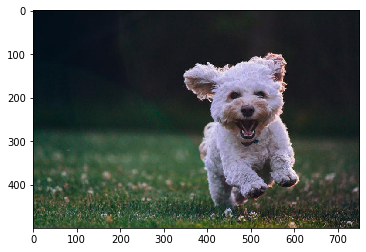

In [5]:
image = plt.imread('img.jpg')
fig, ax = plt.subplots()
im = ax.imshow(image)
plt.show()

### Plot Images by Classes and Tasks

You can get images by filtering classes and tasks

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline 

result = my_dataset.get_images_by_search(class_list=['Dog,person'], task=remo.task.object_detection)


In [10]:
result

[{'classes': ['person', 'Dog'],
  'task': 'Object detection',
  'img': <_io.BytesIO at 0x191259190a0>},
 {'classes': ['bicycle', 'person', 'Dog'],
  'task': 'Object detection',
  'img': <_io.BytesIO at 0x191259192b0>}]

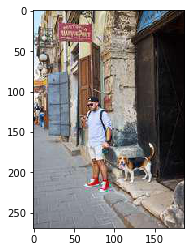

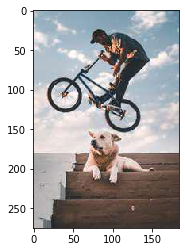

In [38]:
for _img in result:
    im = Image.open(_img['img'])
    im = im.save("im.jpg")
    image = plt.imread('im.jpg')
    fig, ax = plt.subplots()
    im = ax.imshow(image)
    plt.show()